In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

https://www.kaggle.com/datasets/mexwell/student-scores

In [2]:
df = pd.read_csv("student-scores.csv")
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [3]:
df.drop(columns=['email'], inplace=True)

In [4]:
df.shape

(2000, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   gender                      2000 non-null   object
 4   part_time_job               2000 non-null   bool  
 5   absence_days                2000 non-null   int64 
 6   extracurricular_activities  2000 non-null   bool  
 7   weekly_self_study_hours     2000 non-null   int64 
 8   career_aspiration           2000 non-null   object
 9   math_score                  2000 non-null   int64 
 10  history_score               2000 non-null   int64 
 11  physics_score               2000 non-null   int64 
 12  chemistry_score             2000 non-null   int64 
 13  biology_score               2000 non-null   int6

In [6]:
df["career_aspiration"].unique()

array(['Lawyer', 'Doctor', 'Government Officer', 'Artist', 'Unknown',
       'Software Engineer', 'Teacher', 'Business Owner', 'Scientist',
       'Banker', 'Writer', 'Accountant', 'Designer',
       'Construction Engineer', 'Game Developer', 'Stock Investor',
       'Real Estate Developer'], dtype=object)

In [7]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [8]:
df.describe(include=object)

,first_name,last_name,gender,career_aspiration
count,2000,2000,2000,2000
unique,453,707,2,17
top,Michael,Smith,female,Software Engineer
freq,40,41,1002,315


In [9]:
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [10]:
df.duplicated().value_counts()

False    2000
Name: count, dtype: int64

The image below shows that most career aspirations are balanced by gender, except “Teacher” and “Banker” being more representative by females, and Construction Engineer by males.

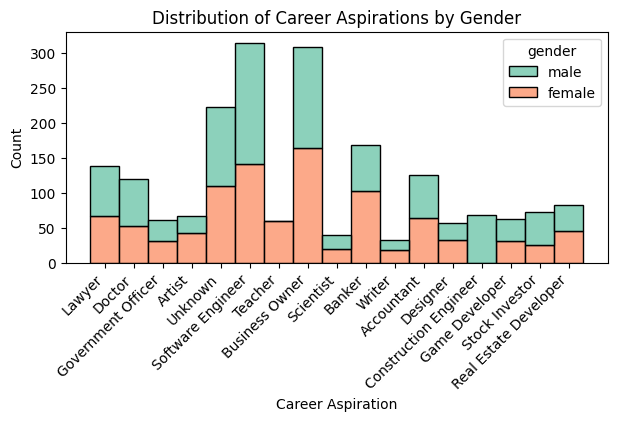

In [11]:
plt.figure(figsize=(7,3))
sns.histplot(data=df, x="career_aspiration", hue='gender',multiple="stack", palette="Set2")

plt.title('Distribution of Career Aspirations by Gender')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Career Aspiration')
plt.ylabel('Count')
plt.show()

The image below shows the distribution of Career Aspirations by gender, but in a different format where the gender frequency can be easily compared.

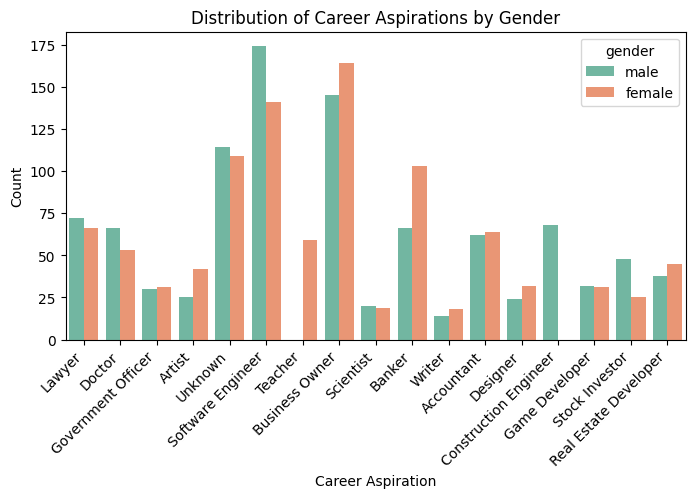

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="career_aspiration", hue="gender", palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Career Aspirations by Gender')
plt.xlabel('Career Aspiration')
plt.ylabel('Count')

plt.show()

In [13]:
df['total score'] = df['math_score'] + df['history_score'] + df['physics_score'] + df['geography_score'] + df['english_score'] + df['biology_score'] + df['chemistry_score']

df['average'] = df['total score']/7
df.head()

,id,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total score,average
0,1,Paul,Casey,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,2,Danielle,Sandoval,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,3,Tina,Andrews,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,4,Tara,Clark,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,5,Anthony,Campos,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521,74.428571


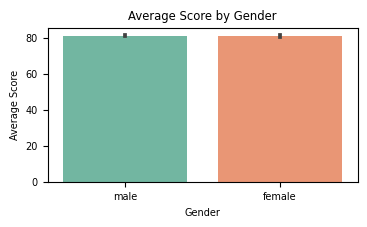

In [14]:
plt.rc('font', size=7)
plt.figure(figsize=(4, 2))
sns.barplot(data=df, x="gender", y="average", palette="Set2")

plt.title('Average Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')

plt.show()

The average score is calculated based on the seven lecture scores contained in the dataset. With that, we can analyse the average score by career aspiration. It suggests that those who possess the highest average scores are aspiring to become doctors, on the other hand with the lowest average scores are those who are aspiring to become a Business Owner. 

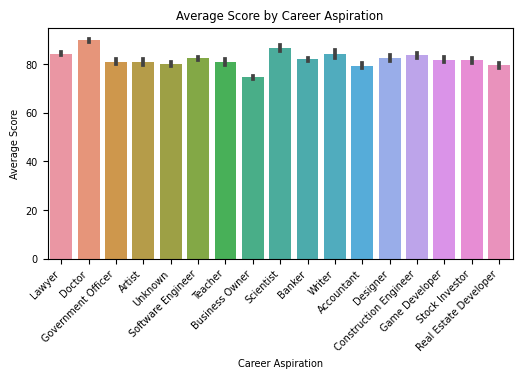

In [15]:
plt.rc('font', size=7)
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x="career_aspiration", y="average")
plt.xticks(rotation=45, ha='right')
plt.title('Average Score by Career Aspiration')
plt.xlabel('Career Aspiration')
plt.ylabel('Average Score')

plt.show()

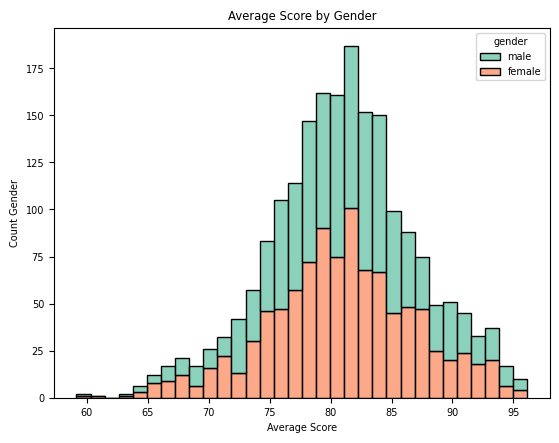

In [16]:
sns.histplot(data=df, x="average", hue='gender',multiple="stack", palette="Set2")
plt.title('Average Score by Gender')
plt.xlabel('Average Score')
plt.ylabel('Count Gender')

plt.show()

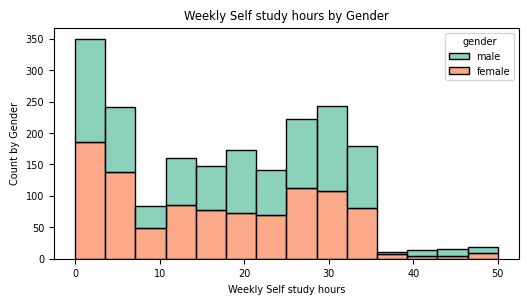

In [17]:
plt.rc('font', size=7)
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x="weekly_self_study_hours", hue="gender", multiple="stack", palette="Set2")
plt.title('Weekly Self study hours by Gender')
plt.xlabel('Weekly Self study hours')
plt.ylabel('Count by Gender')

plt.show()

When analyzing the weekly study hours based on career aspirations, it's noteworthy that individuals who dedicate more time to studying tend to achieve higher average scores. 

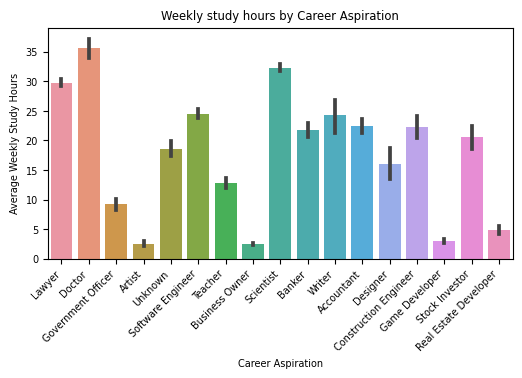

In [18]:
plt.rc('font', size=7)
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x="career_aspiration", y="weekly_self_study_hours")

plt.title('Weekly study hours by Career Aspiration')
plt.xlabel('Career Aspiration')
plt.ylabel('Average Weekly Study Hours')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Convert 'gender' column to numerical values
df['gender_n'] = label_encoder.fit_transform(df['gender'])

print(df[['gender', 'gender_n']].head())

   gender  gender_n
0    male         1
1  female         0
2  female         0
3  female         0
4    male         1


In [20]:
label_encoder = LabelEncoder()
df['ext_activ'] = label_encoder.fit_transform(df['extracurricular_activities'])
df['part_time_job1'] = label_encoder.fit_transform(df['part_time_job'])

print(df[['ext_activ', 'extracurricular_activities']].head())
print(df[['part_time_job1', 'part_time_job']].head())

   ext_activ  extracurricular_activities
0          0                       False
1          0                       False
2          1                        True
3          0                       False
4          0                       False
   part_time_job1  part_time_job
0               0          False
1               0          False
2               0          False
3               0          False
4               0          False


In [21]:
df.head()

,id,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,...,physics_score,chemistry_score,biology_score,english_score,geography_score,total score,average,gender_n,ext_activ,part_time_job1
0,1,Paul,Casey,male,False,3,False,27,Lawyer,73,...,93,97,63,80,87,574,82.000000,1,0,0
1,2,Danielle,Sandoval,female,False,2,False,47,Doctor,90,...,96,100,90,88,90,640,91.428571,0,0,0
2,3,Tina,Andrews,female,False,9,True,13,Government Officer,81,...,95,96,65,77,94,605,86.428571,0,1,0
3,4,Tara,Clark,female,False,5,False,3,Artist,71,...,88,80,89,63,86,551,78.714286,0,0,0
4,5,Anthony,Campos,male,False,5,False,10,Unknown,84,...,65,65,80,74,76,521,74.428571,1,0,0


In [22]:
df_scores = df.drop(columns=['extracurricular_activities', 'part_time_job', 'gender'])

df_scores.head()

,id,first_name,last_name,absence_days,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total score,average,gender_n,ext_activ,part_time_job1
0,1,Paul,Casey,3,27,Lawyer,73,81,93,97,63,80,87,574,82.000000,1,0,0
1,2,Danielle,Sandoval,2,47,Doctor,90,86,96,100,90,88,90,640,91.428571,0,0,0
2,3,Tina,Andrews,9,13,Government Officer,81,97,95,96,65,77,94,605,86.428571,0,1,0
3,4,Tara,Clark,5,3,Artist,71,74,88,80,89,63,86,551,78.714286,0,0,0
4,5,Anthony,Campos,5,10,Unknown,84,77,65,65,80,74,76,521,74.428571,1,0,0


In [23]:
df.columns.unique()

Index(['id', 'first_name', 'last_name', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score',
       'total score', 'average', 'gender_n', 'ext_activ', 'part_time_job1'],
      dtype='object')

In [24]:
df_scores['career_aspiration'].unique()

array(['Lawyer', 'Doctor', 'Government Officer', 'Artist', 'Unknown',
       'Software Engineer', 'Teacher', 'Business Owner', 'Scientist',
       'Banker', 'Writer', 'Accountant', 'Designer',
       'Construction Engineer', 'Game Developer', 'Stock Investor',
       'Real Estate Developer'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'career_aspiration' column
numeric_career_aspiration = label_encoder.fit_transform(df_scores['career_aspiration'])

# Display the unique numeric values
print(numeric_career_aspiration)


[ 9  6  8 ... 12  3  0]


In [26]:
df_scores['num_career'] = numeric_career_aspiration
df_scores.head()

,id,first_name,last_name,absence_days,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total score,average,gender_n,ext_activ,part_time_job1,num_career
0,1,Paul,Casey,3,27,Lawyer,73,81,93,97,63,80,87,574,82.000000,1,0,0,9
1,2,Danielle,Sandoval,2,47,Doctor,90,86,96,100,90,88,90,640,91.428571,0,0,0,6
2,3,Tina,Andrews,9,13,Government Officer,81,97,95,96,65,77,94,605,86.428571,0,1,0,8
3,4,Tara,Clark,5,3,Artist,71,74,88,80,89,63,86,551,78.714286,0,0,0,1
4,5,Anthony,Campos,5,10,Unknown,84,77,65,65,80,74,76,521,74.428571,1,0,0,15


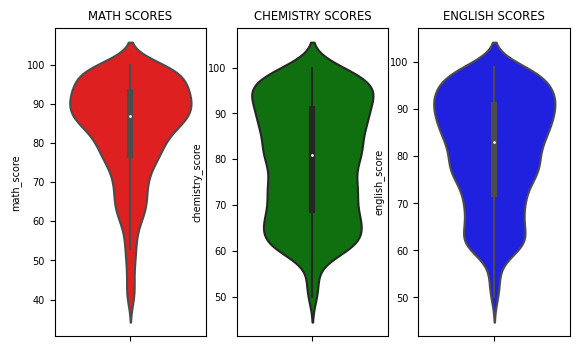

In [27]:
plt.figure(figsize=(9,4))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df_scores,color='red')
plt.subplot(1, 4, 2)
plt.title('CHEMISTRY SCORES')
sns.violinplot(y='chemistry_score',data=df_scores,color='green')
plt.subplot(1, 4, 3)
plt.title('ENGLISH SCORES')
sns.violinplot(y='english_score',data=df_scores,color='blue')

plt.show()

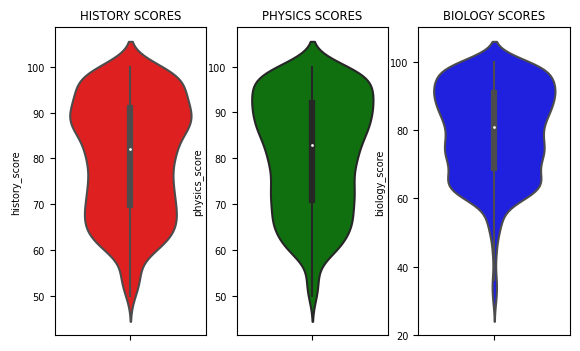

In [28]:
plt.figure(figsize=(9,4))
plt.subplot(1, 4, 1)
plt.title('HISTORY SCORES')
sns.violinplot(y='history_score',data=df,color='red')
plt.subplot(1, 4, 2)
plt.title('PHYSICS SCORES')
sns.violinplot(y='physics_score',data=df,color='green')
plt.subplot(1, 4, 3)
plt.title('BIOLOGY SCORES')
sns.violinplot(y='biology_score',data=df,color='blue')
plt.show()

In [29]:
df_scores.columns.unique()

Index(['id', 'first_name', 'last_name', 'absence_days',
       'weekly_self_study_hours', 'career_aspiration', 'math_score',
       'history_score', 'physics_score', 'chemistry_score', 'biology_score',
       'english_score', 'geography_score', 'total score', 'average',
       'gender_n', 'ext_activ', 'part_time_job1', 'num_career'],
      dtype='object')

In [30]:
correlation_scores = df_scores[['absence_days',
       'weekly_self_study_hours', 'math_score',
       'history_score', 'physics_score', 'chemistry_score', 'biology_score',
       'english_score', 'geography_score', 'total score', 'average',
       'gender_n', 'ext_activ', 'part_time_job1', 'num_career']]

Some insights gained from the correlation matrix:
- Weekly Self study hours has a strong correlation with average and total scores
- Part-time employment exhibits a strong negative correlation with weekly self-study hours, indicating that individuals with part-time jobs typically allocate less time to studying.
- Gender doesn't exhibits considerable correlation with any feature.


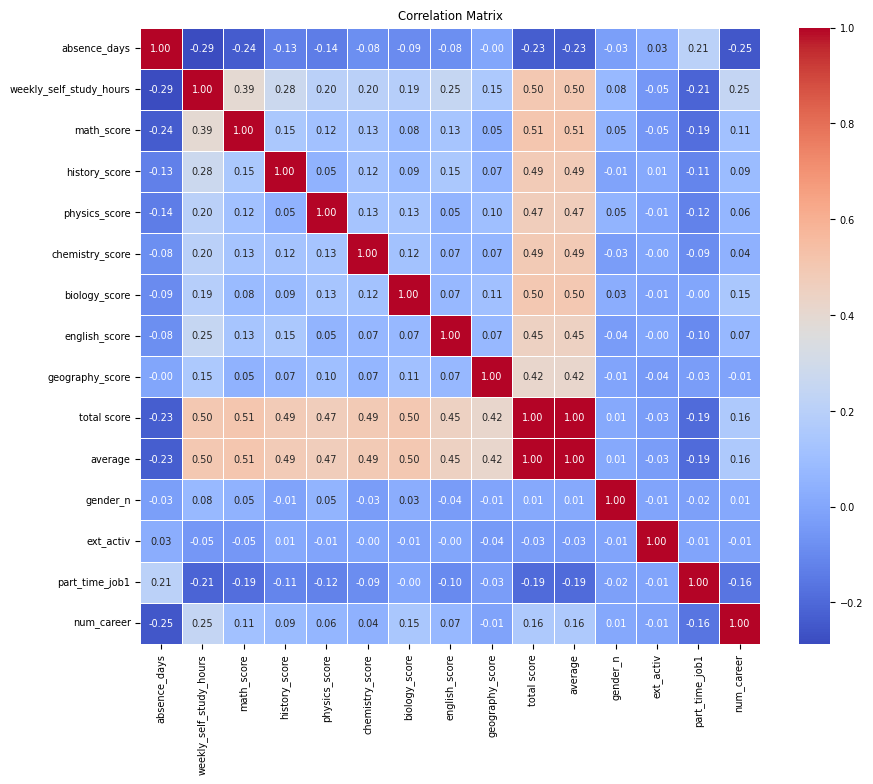

In [31]:
correlation_scores = correlation_scores.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_scores, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Comparation Clustering methods

There are several methods to perform clustering and deciding which is more beneficial depends on the characteristics of the clusters, the features of the dataset, the number of outliers, and the number of data objects. Before going deeper into the chosen methods, we can observe how this dataset behaves among the three cluster models KMeans, Agglomerative, and DBSCAN.
Without applying any scaling method:


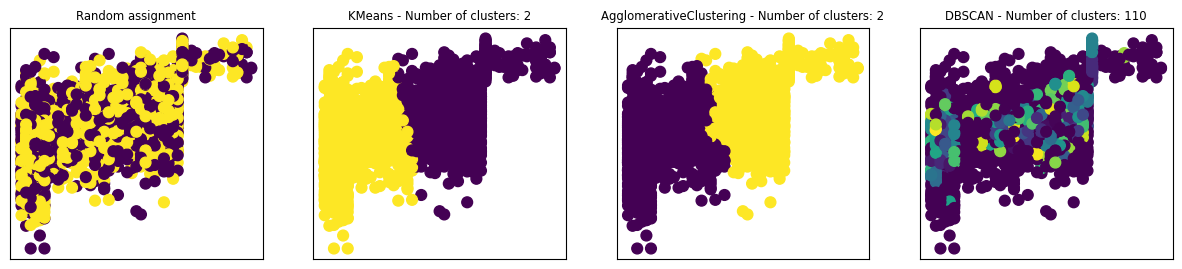

In [32]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

x = df_scores[['weekly_self_study_hours', 'average']]

# Create a figure with subplots for visualization
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# List of algorithms to use
algorithms = [KMeans(n_clusters=2, random_state=38), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# Plotting the random assignment
random_state = np.random.RandomState(seed=38)
random_clusters = random_state.randint(low=0, high=2, size=len(x))
axes[0].scatter(x.iloc[:, 0], x.iloc[:, 1], c=random_clusters, s=60)
axes[0].set_title("Random assignment")

# Iterating over the algorithms to plot the results
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(x)
    ax.scatter(x.iloc[:, 0], x.iloc[:, 1], c=clusters, s=60)
    ax.set_title("{} - Number of clusters: {}".format(algorithm.__class__.__name__, len(np.unique(clusters))))

plt.show()


### KMeans, Agglomerative and DBSCAN after MinMax Scaler 

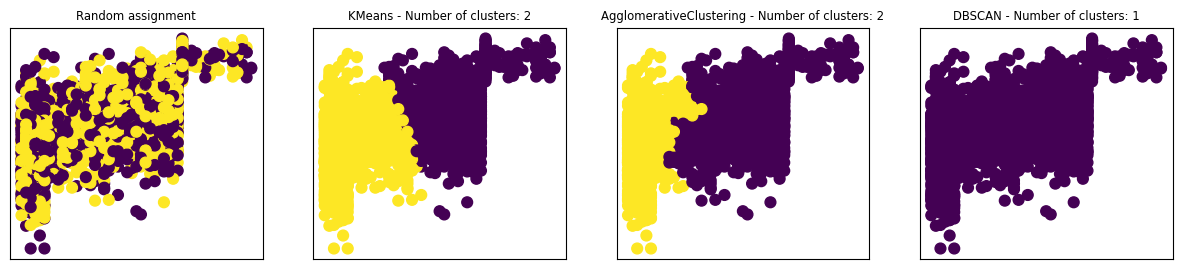

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import numpy as np
import matplotlib.pyplot as plt

x = df_scores[['weekly_self_study_hours', 'average']]

# Rescale the data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Create a figure with subplots for visualization
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# List of algorithms to use
algorithms = [KMeans(n_clusters=2, random_state=38), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# Plotting the random assignment
random_state = np.random.RandomState(seed=38)
random_clusters = random_state.randint(low=0, high=2, size=len(x_scaled))
axes[0].scatter(x_scaled[:, 0], x_scaled[:, 1], c=random_clusters, s=60)
axes[0].set_title("Random assignment")

# Iterating over the algorithms to plot the results
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, s=60)
    ax.set_title("{} - Number of clusters: {}".format(algorithm.__class__.__name__, len(np.unique(clusters))))

plt.show()


### KMeans, Agglomerative and DBSCAN after Standard Scaler 

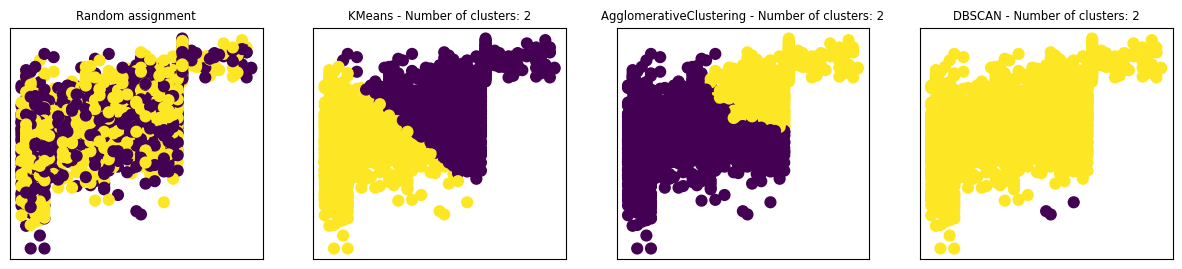

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import numpy as np
import matplotlib.pyplot as plt

x = df_scores[['weekly_self_study_hours', 'average']]

# Rescale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Create a figure with subplots for visualization
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# List of algorithms to use
algorithms = [KMeans(n_clusters=2, random_state=38), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# Plotting the random assignment
random_state = np.random.RandomState(seed=38)
random_clusters = random_state.randint(low=0, high=2, size=len(x_scaled))
axes[0].scatter(x_scaled[:, 0], x_scaled[:, 1], c=random_clusters, s=60)
axes[0].set_title("Random assignment")

# Iterating over the algorithms to plot the results
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, s=60)
    ax.set_title("{} - Number of clusters: {}".format(algorithm.__class__.__name__, len(np.unique(clusters))))

plt.show()


## OPTICS Clustering 

OPTICS stands for Ordering points to identify the clustering structure. It is a density-based unsupervised learning algorithm, which was developed by the same research group that developed DBSCAN. DBSCAN has a major disadvantage in that it struggles to identify clusters in data of varying density. However, OPTICS doesn’t require the density to be consistent across the dataset(Yufeng, 2022).

In [35]:
x_optics = df[['weekly_self_study_hours', 'average']]

In [36]:
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 

# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 5, xi = 0.01, min_cluster_size = 0.1) 
  
# Training the model 
optics_model.fit(x_optics) 

OPTICS(min_cluster_size=0.1, xi=0.01)

In this example, the min_samples parameter controls the minimum number of samples required to form a dense region, the xi parameter controls the maximum distance between two samples to be considered as a neighborhood, and the min_cluster_size parameter controls the minimum size of a dense region to be considered as a cluster.

In [37]:
# Producing the labels according to the DBSCAN technique with eps = 0.5 
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 0.5) 
  
# Producing the labels according to the DBSCAN technique with eps = 2.0 
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 2) 
  
# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(x_optics)) 
  
# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 
  
# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 
  
print(labels) 

[ 0  0  0 ... -1 -1 -1]


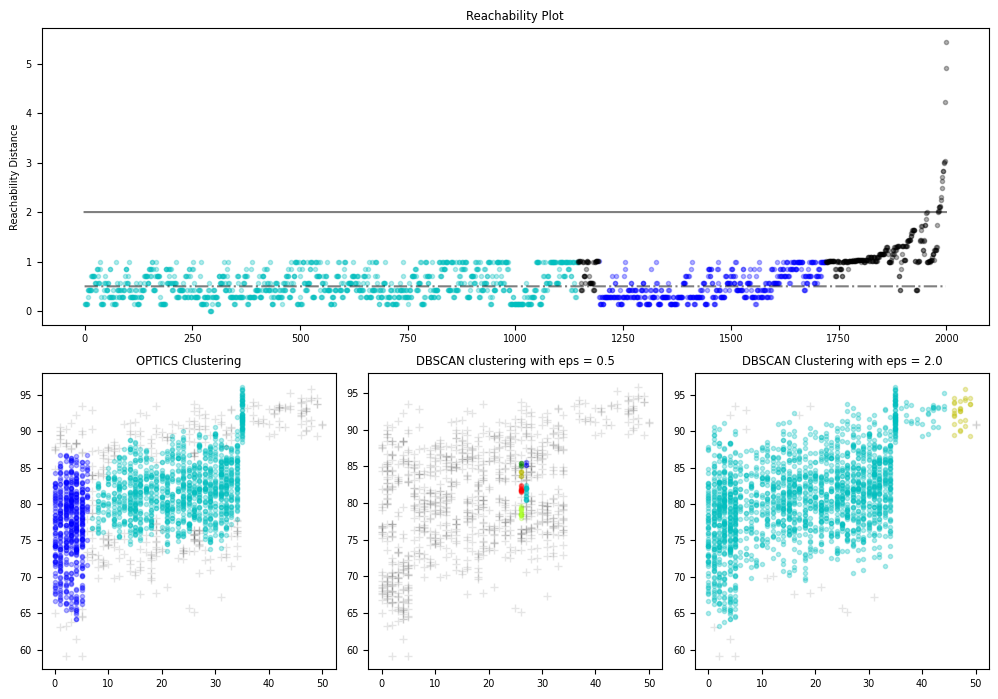

In [38]:
# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = x_optics[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(x_optics.iloc[optics_model.labels_ == -1, 0], 
        x_optics.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = x_optics[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(x_optics.iloc[labels1 == -1, 0], 
        x_optics.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = x_optics.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(x_optics.iloc[labels2 == -1, 0], 
        x_optics.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 

plt.tight_layout() 
plt.show() 

## DBSCAN (x)

In [39]:
x = df[['weekly_self_study_hours', 'average']]

In [40]:
from sklearn.cluster import DBSCAN
# Create an object using dbscan
dbscan = DBSCAN(eps = 5, min_samples = 5)

dbscan.fit(x)

DBSCAN(eps=5)

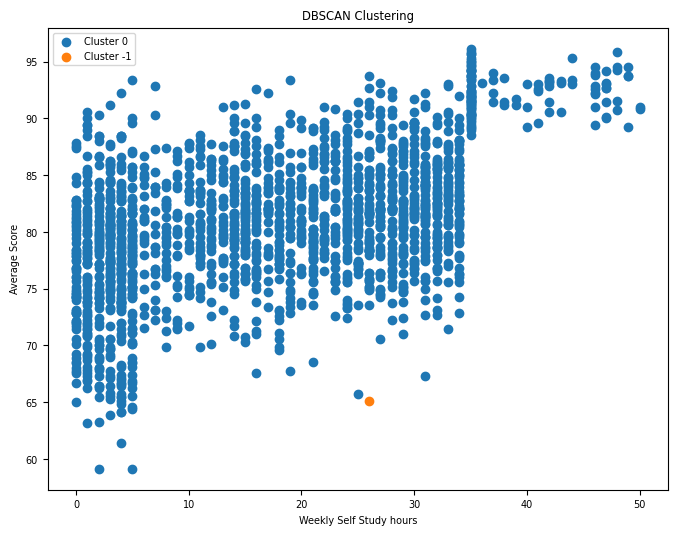

In [41]:
labels = dbscan.labels_

plt.figure(figsize=(8, 6))

# Iterate over each cluster and plot the data points with different colors
for cluster_label in set(labels):
    plt.scatter(x.iloc[labels == cluster_label, 0], 
                x.iloc[labels == cluster_label, 1], 
                label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Weekly Self Study hours')
plt.ylabel('Average Score')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import silhouette_score

# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, labels)}')

Silhouette Score: 0.20708711418198752


### KDistance Graph

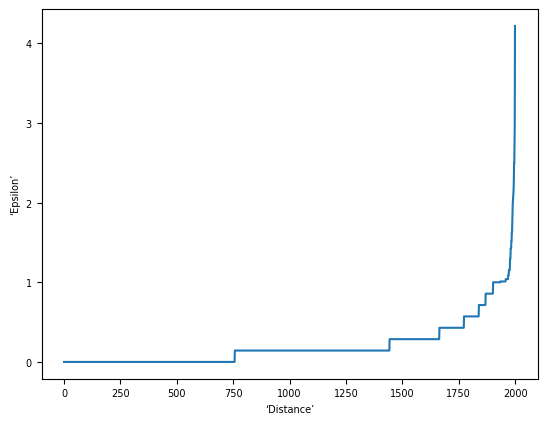

In [43]:
# we use nearestneighbors for calculating distance between points
from sklearn.neighbors import NearestNeighbors
# calculating distances
neigh=NearestNeighbors(n_neighbors=2)
distance=neigh.fit(x)
# indices and distance values
distances,indices=distance.kneighbors(x)
# Now sorting the distance increasing order
sorting_distances=np.sort(distances,axis=0)
# sorted distances
sorted_distances = sorting_distances[:, 1]

# plot between distance vs epsilon
plt.plot(sorted_distances)
plt.xlabel('‘Distance’')
plt.ylabel('‘Epsilon’')
plt.show()

In [44]:
from sklearn.neighbors import NearestNeighbors

# Initialise an object neigh by calling a method NearestNeighbors()
neigh = NearestNeighbors(n_neighbors = 2)

# Train the model by calling a method fit()
nbrs = neigh.fit(x)

# Store the distance and indices into distances and indices arrays
distances, indices = nbrs.kneighbors(x)

print(distances, indices)

[[0.         0.        ]
 [0.         1.01015254]
 [0.         0.14285714]
 ...
 [0.         0.28571429]
 [0.         0.14285714]
 [0.         0.        ]] [[ 129    0]
 [   1  588]
 [   2  755]
 ...
 [1997   87]
 [1998  945]
 [1999 1991]]


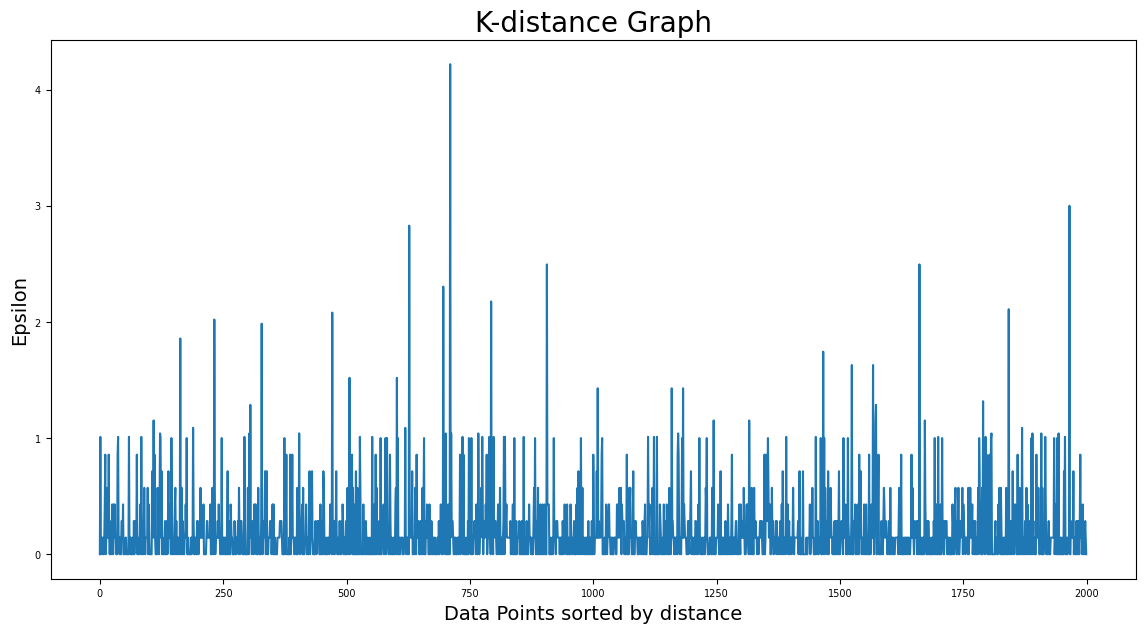

In [45]:
# Plotting K-distance Graph
# distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize = (14,7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

## DBSCAN (x_scaled)

In [170]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar as características que você deseja normalizar
x = df[['weekly_self_study_hours', 'average']]

# Inicializar o scaler
scaler = MinMaxScaler()

# Ajustar o scaler aos dados e transformar os dados
x_scaled = scaler.fit_transform(x)


In [171]:
from sklearn.cluster import DBSCAN

# Initialise an object by calling a method DBSCAN along with parameters as eps and min_samples
dbscan_opt = DBSCAN(eps = 0.3)

# Train the model by calling a method fit()
dbscan_opt.fit(x_scaled)

DBSCAN(eps=0.3)

In [172]:
from sklearn.metrics import silhouette_score
labels = dbscan.labels_
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x_scaled, labels)}')

Silhouette Score: 0.2893082217615612


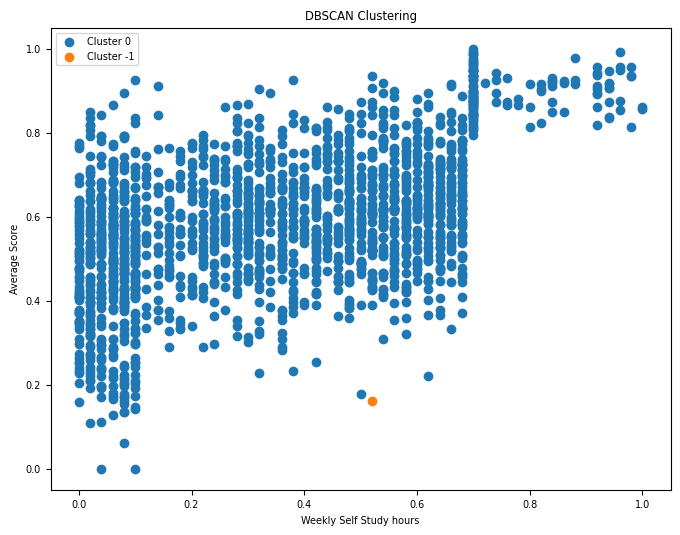

In [173]:
plt.figure(figsize=(8, 6))

# Iterate over each cluster and plot the data points with different colors
for cluster_label in set(labels):
    plt.scatter(x_scaled[labels == cluster_label, 0], 
                x_scaled[labels == cluster_label, 1], 
                label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Weekly Self Study hours')
plt.ylabel('Average Score')
plt.legend()
plt.show()

## Agglomerative (x_scaled)

In [76]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

x_agglomerative = df[['weekly_self_study_hours', 'average']]

scaler = StandardScaler()
x_scaled_agg = scaler.fit_transform(x)

# Parâmetros para ajustar
param_grid = {
    'n_clusters': [2, 3, 4, 5]}

model = AgglomerativeClustering()

# Grid search
grid_search = GridSearchCV(model, param_grid, scoring='v_measure_score', cv=5)
grid_search.fit(x_scaled_agg)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Melhores parâmetros:", best_params)
print("Melhor pontuação (v_measure_score):", best_score)


Melhores parâmetros: {'n_clusters': 2}
Melhor pontuação (v_measure_score): nan


### Dendrogram

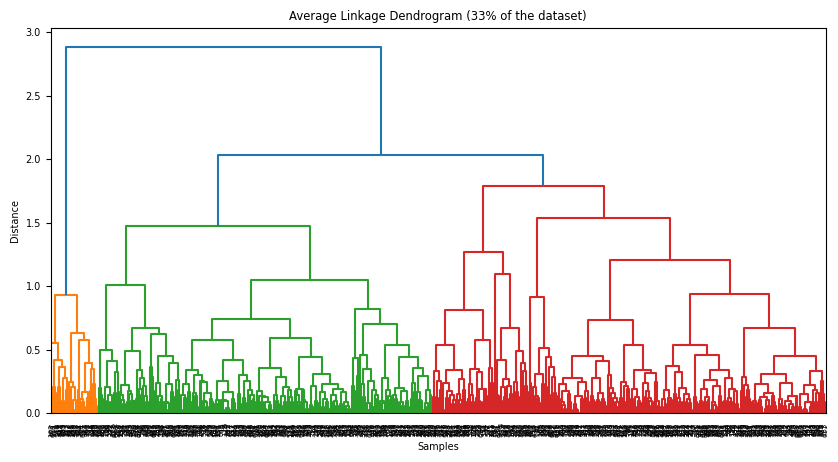

In [125]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Split data to make it less expensive to process
split_point = len(x_scaled_agg) // 3
x_scaled_half = x_scaled_agg[:split_point]

# Compute linkage for the first half of the data
Z = linkage(x_scaled_half, method='average')

# Plot the dendrogram
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Average Linkage Dendrogram (33% of the dataset)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

linkage : {'ward', 'complete', 'average', 'single'}, default='ward'
    Which linkage criterion to use. The linkage criterion determines which
    distance to use between sets of observation. The algorithm will merge
    the pairs of cluster that minimize this criterion.

Average linkage determines the distance between two clusters as the average distance between all pairs of points in the two clusters. This method tends to produce clusters that are somewhere between the long, chain-like clusters produced by single linkage and the compact, spherical clusters produced by complete linkage (Bismi, 2023).

In [157]:
model = AgglomerativeClustering(n_clusters=2, linkage='average')
model.fit(x_scaled_agg)

AgglomerativeClustering(linkage='average')

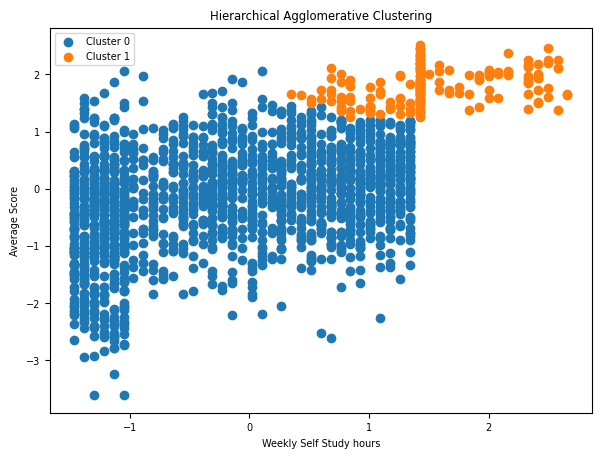

In [158]:
labels_agg = model.labels_

plt.figure(figsize=(7, 5))

# Iterate over each cluster and plot the data points with different colors
for cluster_label in set(labels_agg):
    plt.scatter(x_scaled_agg[labels_agg == cluster_label, 0], 
                x_scaled_agg[labels_agg == cluster_label, 1], 
                label=f'Cluster {cluster_label}')

plt.title('Hierarchical Agglomerative Clustering')
plt.xlabel('Weekly Self Study hours')
plt.ylabel('Average Score')
plt.legend()
plt.show()

In [159]:
from sklearn.metrics import silhouette_score

# Display the silhouette score values
print(f'Silhouette Score(n = 2): {silhouette_score(x_scaled_agg, labels_agg)}')

Silhouette Score(n = 2): 0.3873336767969822


In [160]:
from sklearn.metrics import davies_bouldin_score
dbi_score = davies_bouldin_score(x_scaled_agg, labels_agg)
print("Davies-Bouldin Index:", dbi_score)

Davies-Bouldin Index: 0.6529816127725958


## KMeans (x)
KMeans performed better on this dataset without scaling

This algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster. First, each data point is randomly assigned to one of the K clusters. Then, it computes the centroid (functionally the center) of each cluster and reassigns each data point to the cluster with the closest centroid. This process repeats until the cluster assignments for each data point are no longer changing (www.w3schools.com, n.d.).

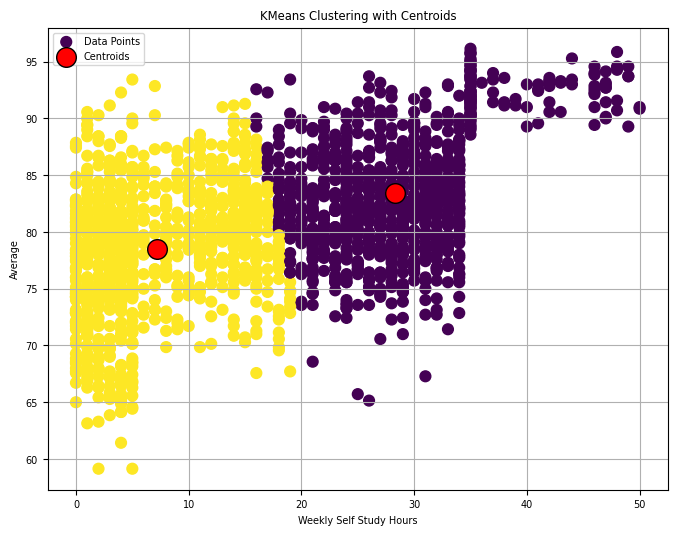

In [187]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

x_Kmeans = df[['weekly_self_study_hours', 'average']]

# Create KMeans object
kmeans = KMeans(n_clusters=2, random_state=38)

# Fit KMeans clustering
kmeans.fit(x_Kmeans)

# Extract cluster centroids
centroids = kmeans.cluster_centers_

# Assign clusters to each data point
n_clusters = kmeans.predict(x_Kmeans)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x_Kmeans.iloc[:, 0], x_Kmeans.iloc[:, 1], c=n_clusters, s=60, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=200, edgecolor='k', label='Centroids')
plt.title("KMeans Clustering with Centroids")
plt.xlabel("Weekly Self Study Hours")
plt.ylabel("Average")
plt.legend()
plt.grid(True)
plt.show()

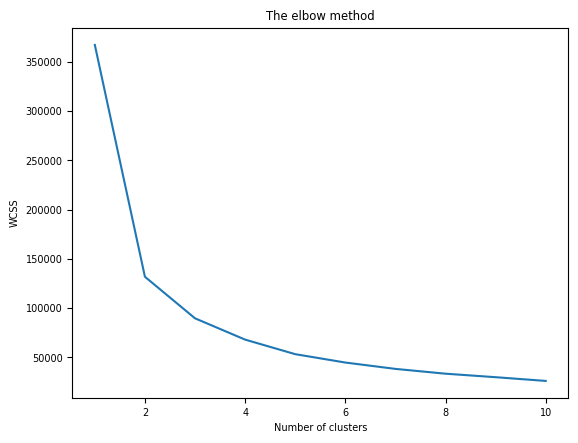

In [169]:
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 100, n_init = 10, random_state = 60)  # Initialise an object kmeans by calling 
                                                                                    # an object KMeans()
    kmeans.fit(x)                                                                   # Training the model by calling fit() method
    wcss.append(kmeans.inertia_)                                                    # Store kmeans.inertia_ in the array wcss
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

To measure how well the model performed, we can employ the Silhouette Score. It measures how similar an object is to its cluster compared to other clusters. A score closer to 1 indicates that the object is well-matched to its cluster and poorly matched to neighboring clusters. 
The Silhouette score yields a reasonable outcome, attributed to the distribution of the data points. For instance, in the first cluster, there are fewer students with low averages and fewer with high averages increasing the distance between the points. Furthermore, the clusters are not distinctly separated, resulting in nearby points belonging to different clusters. 


For n_clusters = 2 The average silhouette_score is : 0.5305666224426079


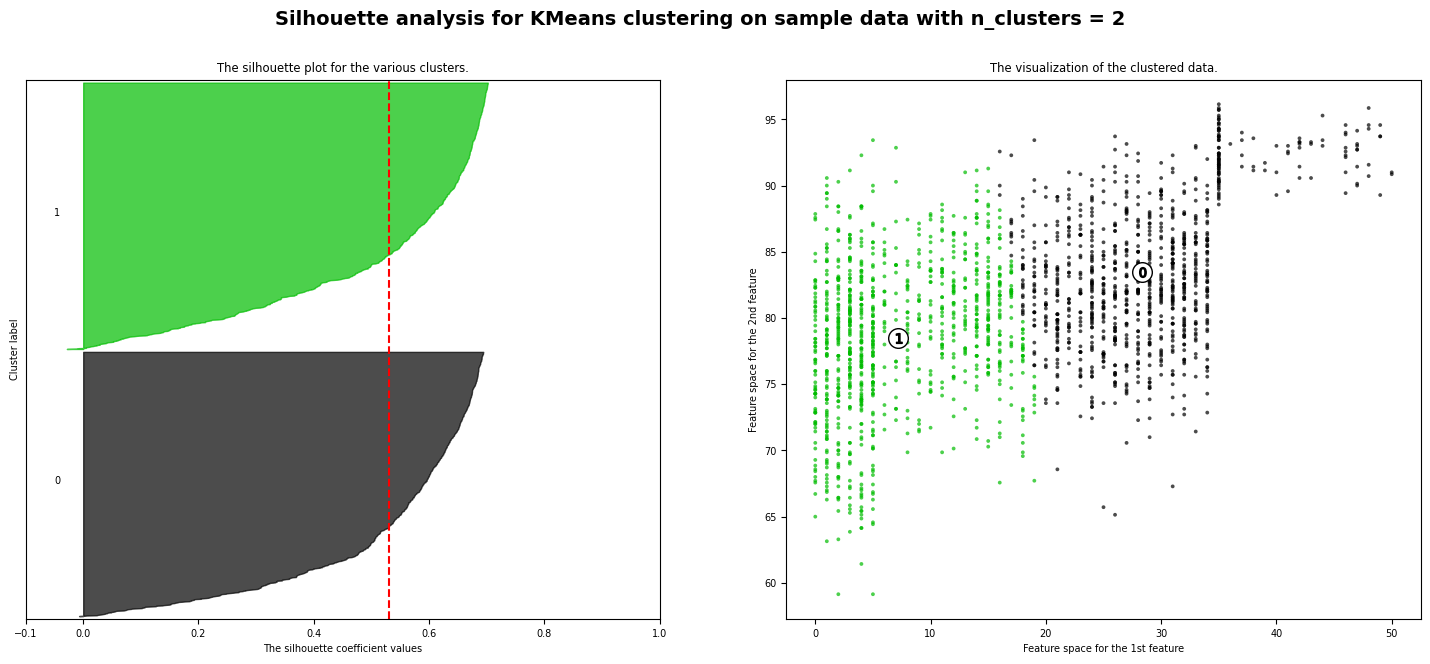

For n_clusters = 3 The average silhouette_score is : 0.4274574037467047


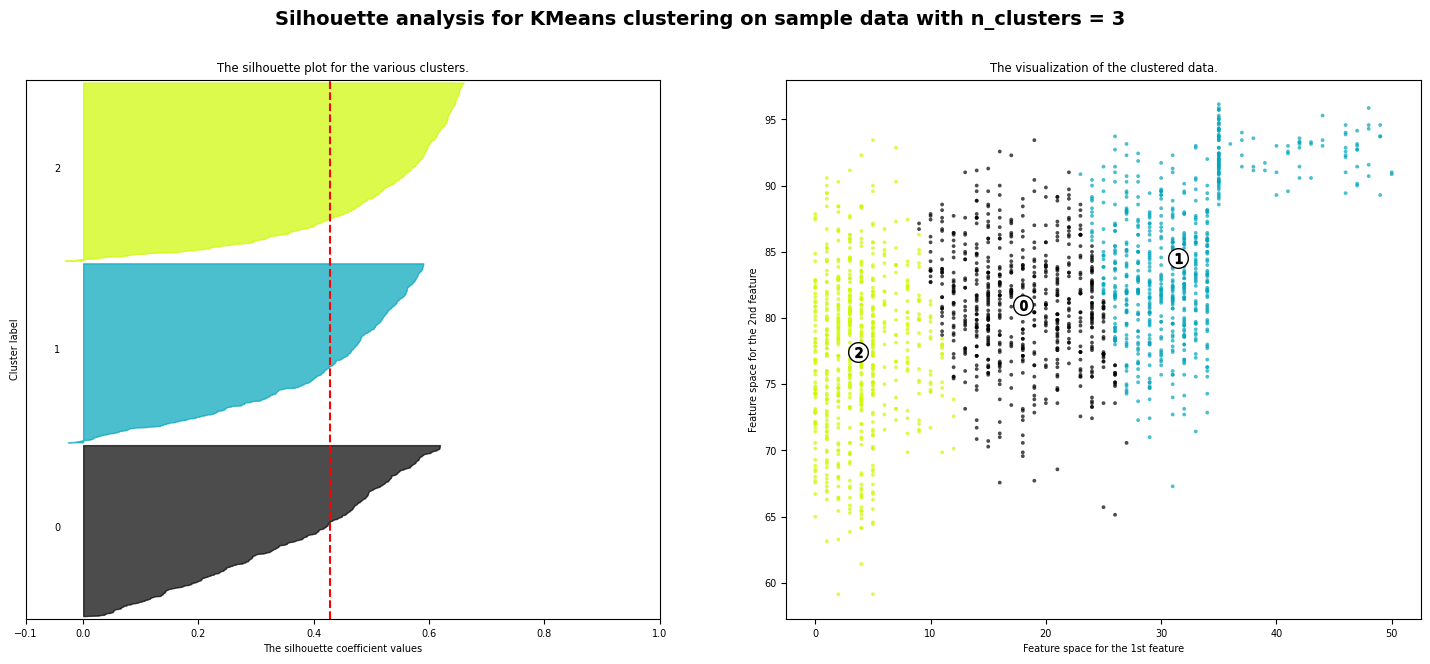

For n_clusters = 4 The average silhouette_score is : 0.41435618550793074


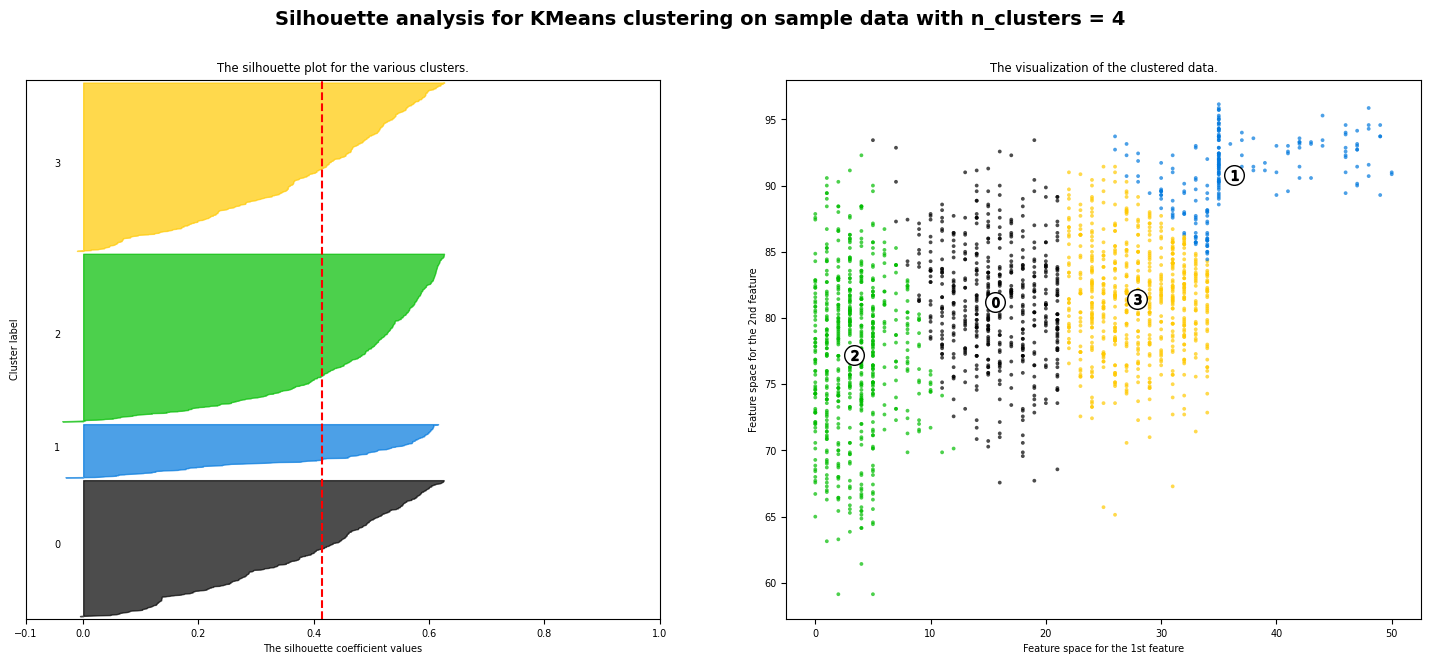

For n_clusters = 5 The average silhouette_score is : 0.39312189768539646


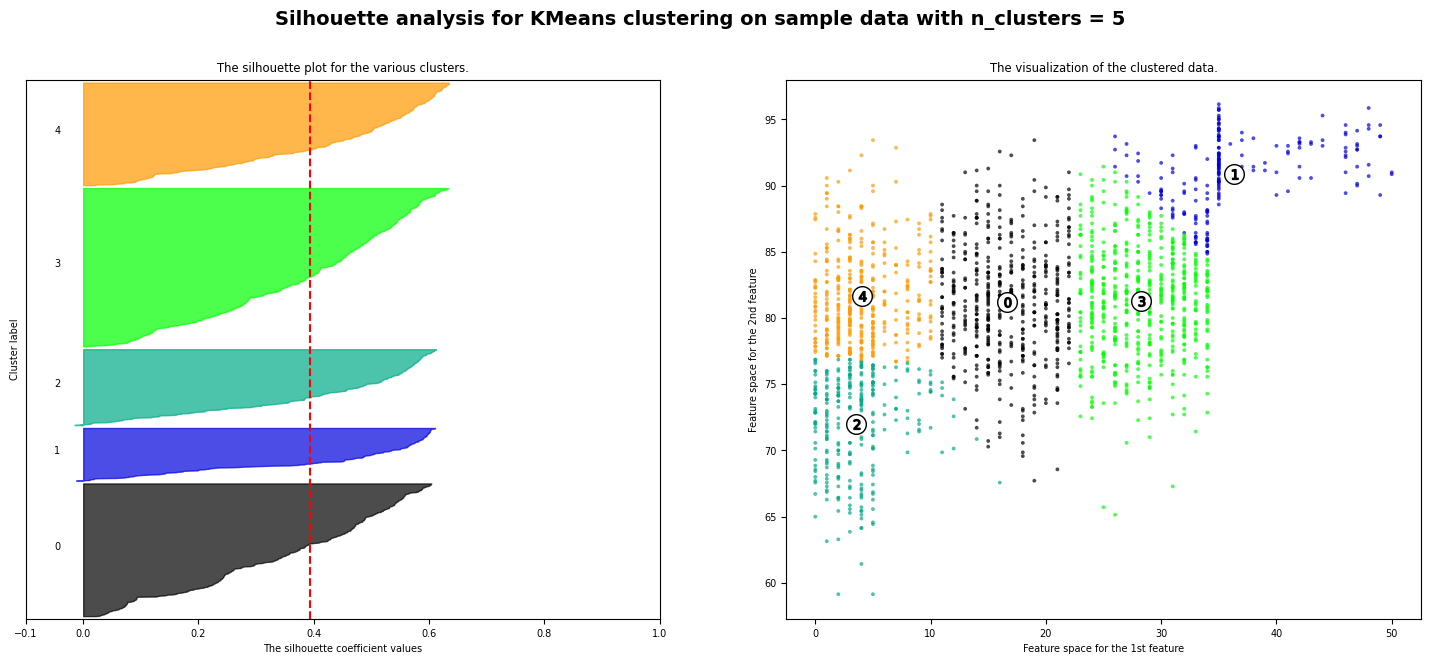

For n_clusters = 6 The average silhouette_score is : 0.3815418851140206


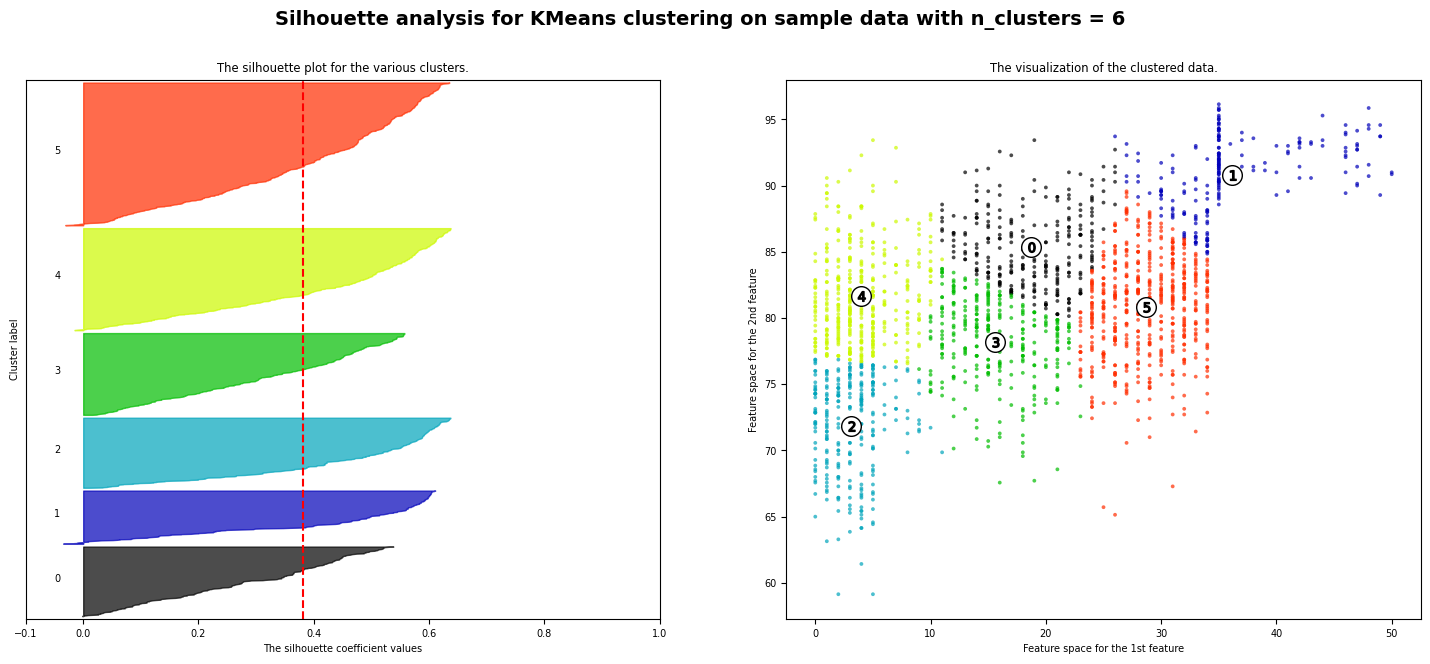

For n_clusters = 7 The average silhouette_score is : 0.37371984635199473


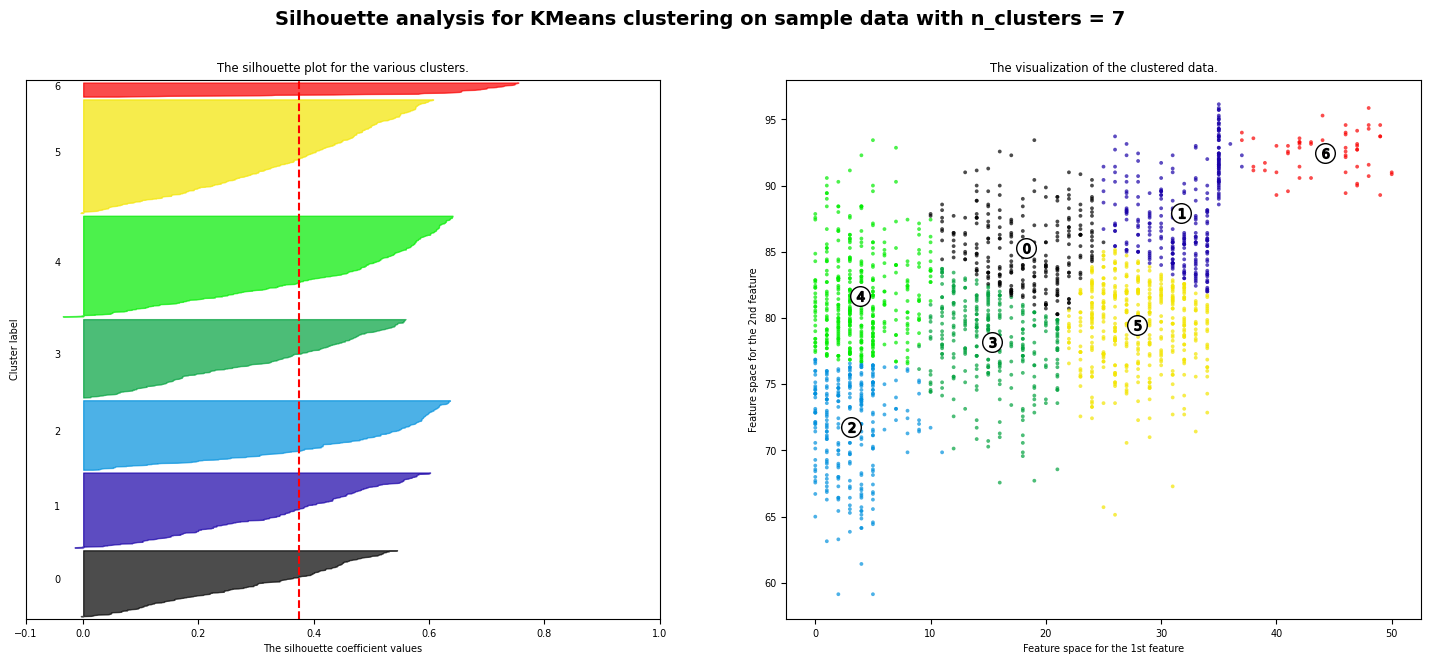

For n_clusters = 8 The average silhouette_score is : 0.37440371273214035


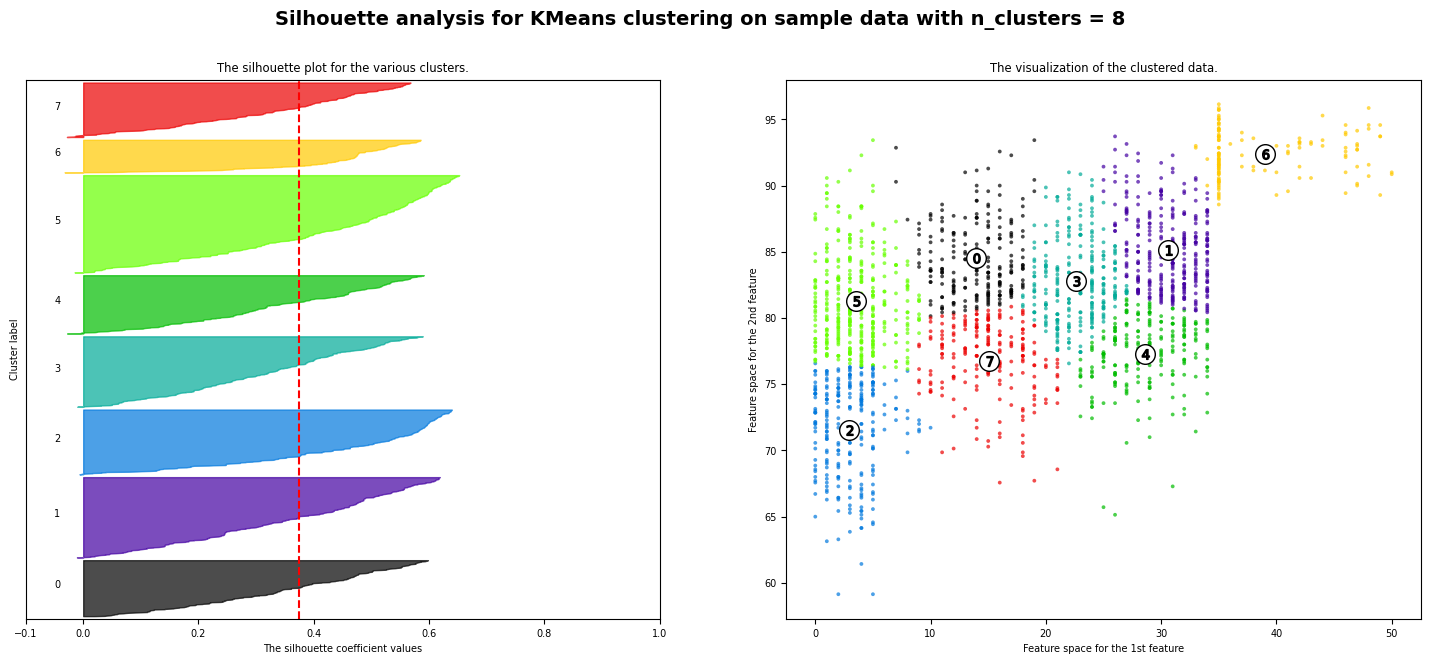

For n_clusters = 9 The average silhouette_score is : 0.35721269203838385


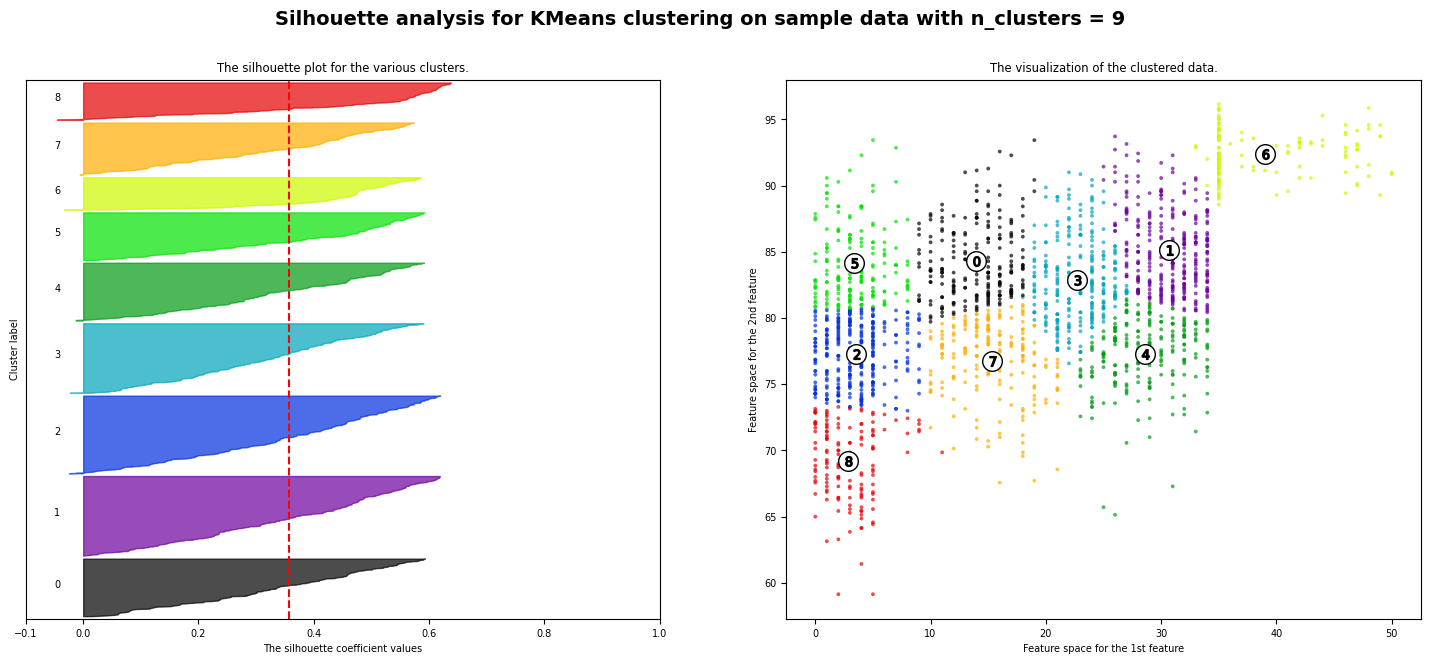

In [167]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

x = df[['weekly_self_study_hours', 'average']]

# Visualizing Silhouette coefficient
for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels/ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x.iloc[:, 0], x.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()


In [128]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
# Define the parameter grid
param_grid = {'n_clusters': [2, 3, 4, 5, 6]}

# Create a custom scoring function using silhouette score
def silhouette_scorer(estimator, x):
    labels = estimator.fit_predict(x)
    return silhouette_score(x, labels)

# Create a grid search object with silhouette scorer as the scoring metric
grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring=silhouette_scorer)

# Fit the grid search to the data
grid_search.fit(x)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_clusters': 2}
Best Score: 0.531669033906911


In [188]:
# Display the silhouette score values
print(f'Silhouette Score(n = 2): {silhouette_score(x_Kmeans, n_clusters)}')

Silhouette Score(n = 2): 0.5305666224426079


The Davies-Bouldin Index evaluates the average similarity between clusters, where a lower value signifies improved separation. At 0.67, the clusters exhibit reasonably good separation. However, certain data points in the middle display similar distances to both centroids, leading to less distinct cluster boundaries. This phenomenon is attributable to the dataset's distribution.

In [189]:
from sklearn.metrics import davies_bouldin_score
dbi_score = davies_bouldin_score(x_Kmeans, n_clusters)
print("Davies-Bouldin Index:", dbi_score)

Davies-Bouldin Index: 0.6681108651159062


The Calinski–Harabasz index shows how well-separated and dense the clusters are. The clustering quality is characterized by the ratio of inter-cluster dispersion to intra-cluster dispersion, using the Euclidean distance.

In [190]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(x_Kmeans, n_clusters)
print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 3562.3177198524445


### Silhouette and Davies Douldin score

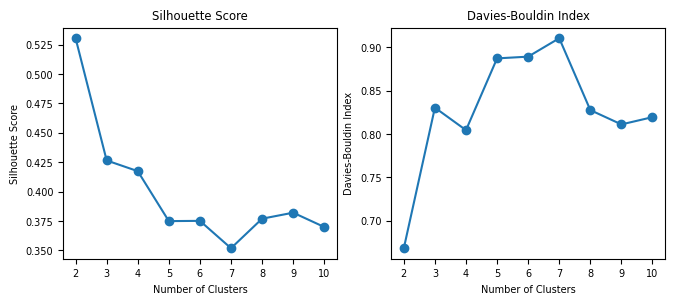

In [196]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Function to perform k-means clustering and calculate metrics
def perform_clustering(n_clusters, x_Kmeans):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(x_Kmeans)
    db_index = davies_bouldin_score(x_Kmeans, labels)
    silhouette_avg = silhouette_score(x_Kmeans, labels)
    return db_index, silhouette_avg

# Vary the number of clusters and store metrics
cluster_range = range(2, 11)
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg = perform_clustering(n_clusters, x_Kmeans)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

# Plot the Davies-Bouldin Index, and Silhouette Score
plt.figure(figsize=(12, 3))

# Elbow method
plt.subplot(1, 3, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Davies-Bouldin Index
plt.subplot(1, 3, 2)
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

plt.show()


## Summary
Adding column clusters on dataset (Kmeans and Agglomerative)

In [93]:
df_scores['Cluster_Kmeans'] = clusters

In [94]:
df_scores.head()

,id,first_name,last_name,absence_days,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,...,geography_score,total score,average,gender_n,ext_activ,part_time_job1,num_career,Cluster,Cluster_Kmeans,Cluster_Agg
0,1,Paul,Casey,3,27,Lawyer,73,81,93,97,...,87,574,82.000000,1,0,0,9,0,0,0
1,2,Danielle,Sandoval,2,47,Doctor,90,86,96,100,...,90,640,91.428571,0,0,0,6,0,0,1
2,3,Tina,Andrews,9,13,Government Officer,81,97,95,96,...,94,605,86.428571,0,1,0,8,1,1,0
3,4,Tara,Clark,5,3,Artist,71,74,88,80,...,86,551,78.714286,0,0,0,1,1,1,0
4,5,Anthony,Campos,5,10,Unknown,84,77,65,65,...,76,521,74.428571,1,0,0,15,1,1,0


In [95]:
df_scores_clusters = df_scores.groupby('Cluster_Kmeans').agg({'average': ['min', 'max', 'mean'], 'weekly_self_study_hours': ['min', 'max']})
df_scores_clusters

average                       weekly_self_study_hours    
                      min        max       mean                     min max
Cluster_Kmeans                                                             
0               65.142857  96.142857  83.452811                      16  50
1               59.142857  93.428571  78.527604                       0  19

In [84]:
df_scores['Cluster_Agg'] = labels_agg

In [86]:
df_scores_clusters_agg = df_scores.groupby('Cluster_Agg').agg({'average': ['min', 'max', 'mean'], 'weekly_self_study_hours': ['min', 'max']})
df_scores_clusters_agg

average                       weekly_self_study_hours    
                   min        max       mean                     min max
Cluster_Agg                                                             
0            59.142857  93.428571  79.946800                       0  34
1            88.571429  96.142857  91.826765                      22  50

## ARIMA
## Carriage Services Stock Dataset

ARIMA is a general class of statistical models for time series analysis forecasting. It stands for Auto-Regressive Integrated Moving Average. When applying ARIMA models, we use a time series of past values and/or forecast errors to predict future values (Justin, 2022).

In [2]:
df_stock = pd.read_csv('Carriage Services.csv')
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-13,31.730000,32.070000,31.030001,31.400000,30.862207,103400
1,2023-03-14,32.180000,32.759998,31.559999,31.889999,31.343813,79600
2,2023-03-15,31.299999,31.840000,31.020000,31.820000,31.275013,119200
3,2023-03-16,31.389999,32.560001,31.030001,32.209999,31.658335,78600
4,2023-03-17,32.130001,32.320000,31.340000,31.650000,31.107924,140200


In [3]:
df_stock.shape

(250, 7)

In [4]:
# Store the 'Date' column into dataframe 
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%Y-%m-%d')

# Attach your own 'Data' index to the dataframe
df_stock.index = df_stock['Date']

# Drop the 'Date' column from the dataframe
df_stock.drop('Date', axis = 1, inplace = True)

In [5]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-03-13 to 2024-03-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [6]:
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13,31.730000,32.070000,31.030001,31.400000,30.862207,103400
2023-03-14,32.180000,32.759998,31.559999,31.889999,31.343813,79600
2023-03-15,31.299999,31.840000,31.020000,31.820000,31.275013,119200
2023-03-16,31.389999,32.560001,31.030001,32.209999,31.658335,78600
2023-03-17,32.130001,32.320000,31.340000,31.650000,31.107924,140200


In [7]:
df_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,27.374440,27.763880,26.944160,27.323360,27.057636,97084.400000
std,3.508316,3.511340,3.517828,3.478593,3.359352,63318.612615
min,20.660000,21.280001,18.059999,20.150000,20.059715,24700.000000
25%,24.660000,25.069999,24.322500,24.685000,24.544531,62375.000000
50%,27.369999,27.689999,26.979999,27.354999,27.000588,82600.000000
75%,30.480000,30.855001,29.987500,30.400000,30.085535,112950.000000
max,34.450001,35.590000,33.860001,34.189999,33.747028,582600.000000


In [8]:
df_stock.shape

(250, 6)

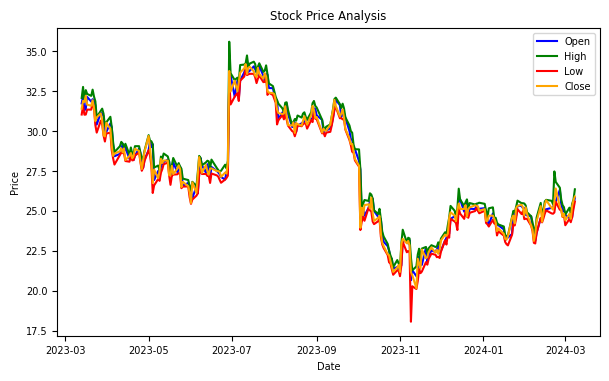

In [9]:
import matplotlib as mpl

# Plot the data
mpl.rcParams.update({'font.size': 7})
plt.figure(figsize=(7, 4))
plt.plot(df_stock.index, df_stock['Open'], label='Open', color='blue')
plt.plot(df_stock.index, df_stock['High'], label='High', color='green')
plt.plot(df_stock.index, df_stock['Low'], label='Low', color='red')
plt.plot(df_stock.index, df_stock['Close'], label='Close', color='orange')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Analysis')
plt.legend()
plt.show()

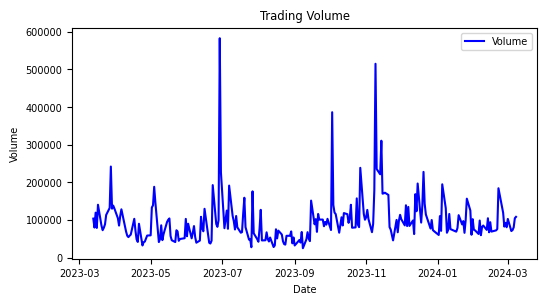

In [14]:
# Plot Volume separately
plt.figure(figsize=(6, 3))
plt.plot(df_stock.index, df_stock['Volume'], label='Volume', color='blue')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume')
plt.legend()
plt.show()

Stationarity is an important characteristic of time series. A time series is said to be
stationary if its statistical properties do not change over time. In other words, it has
constant mean and variance, and covariance is independent of time.
The process above is not stationary. Notice how the 'Close' mean is not constant through time.

Augmented Dickey Fuller test (ADF Test) is
identified as the common statistical test
employed to test whether a given Time series
is stationary or not. Plot below

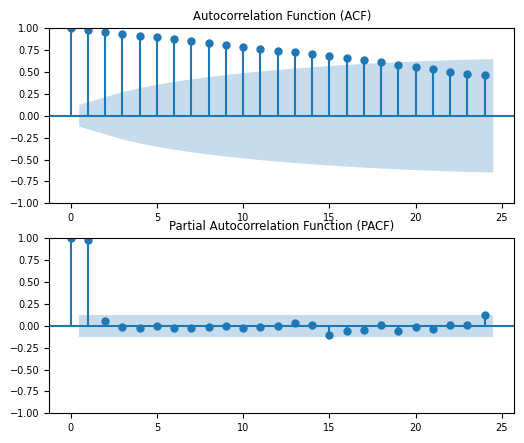

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5))

# ACF plot
plot_acf(df_stock['Close'], ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df_stock['Close'], ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
# Perform Augmented Dickey-Fuller (ADF) test
result = adfuller(df_stock['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -1.7768885901589597
p-value: 0.39199472020640636
Critical Values:
	1%: -3.4568881317725864
	5%: -2.8732185133016057
	10%: -2.5729936189738876


From the test results:

ADF Statistic: The ADF statistic is -1.7768885901589597. This value is less than the critical values at 1%, 5%, and 10% significance levels, which suggests that the series is non-stationary.

p-value: The p-value is 0.39199472020640636. Since the p-value is greater than 0.05 (the typical significance level), we fail to reject the null hypothesis. This also indicates that the series is non-stationary.

Critical Values: The critical values provide thresholds for the ADF statistic. The fact that the ADF statistic is greater than these critical values further supports the conclusion that the series is non-stationary.

### Order Differencing ARIMA

As the dataset is non-stationary, differencing can be applied to transform it into a stationary form. Comparing the images below with the original series reveals that the first difference time series exhibits a diminished trend. However, post-differencing, both the autocorrelation function (ACF) and partial autocorrelation function (PACF) show similarities, indicating potential autocorrelation remaining in the differenced series. This occurrence may stem from factors like seasonality present in the dataset. While ACF and PACF plots offer valuable diagnostic insights for ARIMA modeling, overall model performance should be assessed across multiple metrics, including forecast accuracy and statistical significance. A well-performing model suggests effective capture of key data features, even if diagnostic plots don't entirely align with expectations.

In [17]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = df_stock['Close'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

Date
2023-03-14    0.489999
2023-03-15   -0.069999
2023-03-16    0.389999
2023-03-17   -0.559999
2023-03-20   -0.070000
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of Carriage Services during Mar 2023-Mar 2024')

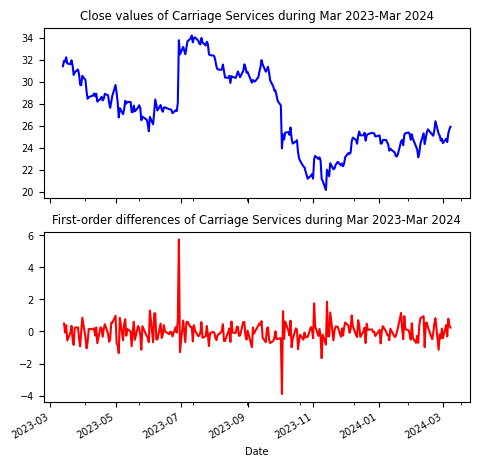

In [18]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df_stock['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of Carriage Services during Mar 2023-Mar 2024')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of Carriage Services during Mar 2023-Mar 2024')

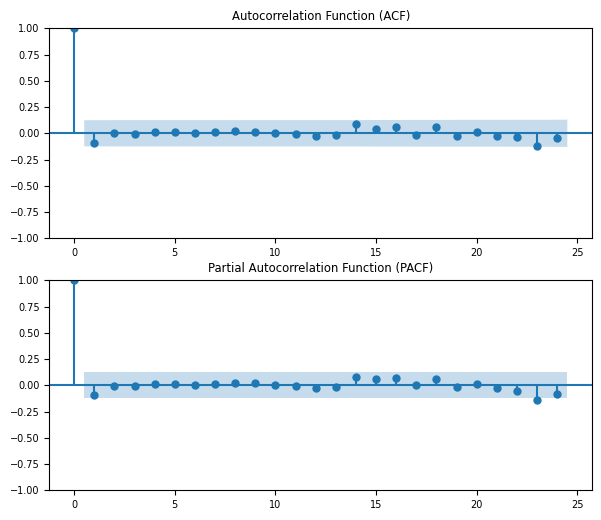

In [19]:
import matplotlib as mpl
# Plot ACF and PACF
mpl.rcParams.update({'font.size': 7})
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6)) 

# ACF plot
plot_acf(first_order_diff, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(first_order_diff, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

The p-value is enough to reject the null hypothesis at a 5% significance level. So we can conclude that our first difference time series is likely to be stationary. Said that our (d)parameter is settled to 1.

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(first_order_diff)
print('p-value:', result[1])

p-value: 5.748664514327379e-30


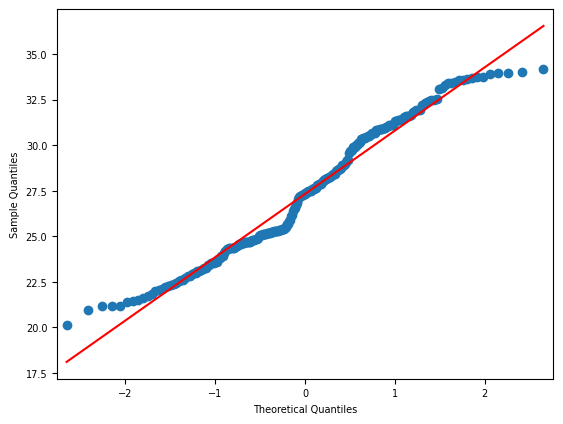

In [21]:
import statsmodels.api as sm
# qqplot for the 'Close' column
x = sm.qqplot(df_stock['Close'], line = 's')

In [22]:
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math 

### Auto ARIMA

In [24]:
data_AutoArima = pd.DataFrame(df_stock[["Close"]])
data_AutoArima.head()

,Close
Date,
2023-03-13,31.400000
2023-03-14,31.889999
2023-03-15,31.820000
2023-03-16,32.209999
2023-03-17,31.650000


In [25]:
data_AutoArima.shape

(250, 1)

In [26]:
import pmdarima as pm
auto_arima = pm.auto_arima(data_AutoArima, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [27]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -262.235
Date:                Fri, 05 Apr 2024   AIC                            530.470
Time:                        18:05:43   BIC                            541.022
Sample:                             0   HQIC                           534.717
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0224      0.043     -0.527      0.598      -0.106       0.061
ma.L1         -0.0972      0.065     -1.485      0.138      -0.225       0.031
sigma2         0.4811      0.015     31.092      0.000       0.451       0.511
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5182.05
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             1.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(data_AutoArima['Close'].tolist(), order = (0, 1, 1))

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -262.394
Date:                Fri, 05 Apr 2024   AIC                            528.788
Time:                        18:06:46   BIC                            535.823
Sample:                             0   HQIC                           531.619
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0956      0.064     -1.482      0.138      -0.222       0.031
sigma2         0.4817      0.015     33.168      0.000       0.453       0.510
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5172.81
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             1.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# Declare the array 'pred' and append the values 
pred = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
data_AutoArima['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into dataframe
data_AutoArima['diffval'] = diffval

# Display first five records
data_AutoArima.head()

,Close,ARIMA,diffval
Date,,,
2023-03-13,31.400000,0.000000,31.400000
2023-03-14,31.889999,31.399999,31.889999
2023-03-15,31.820000,31.843588,31.820000
2023-03-16,32.209999,31.822254,32.209999
2023-03-17,31.650000,32.172937,31.650000


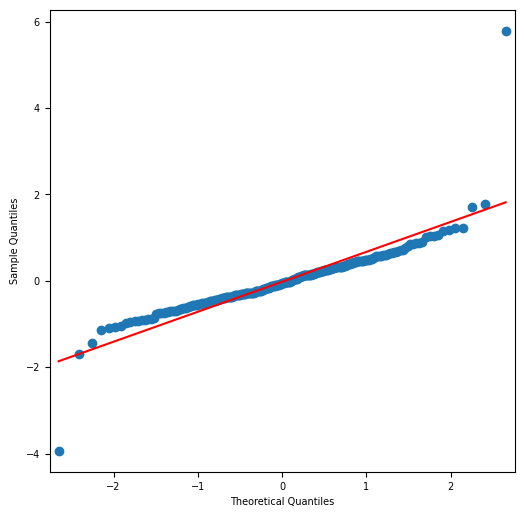

In [35]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
fig, ax = plt.subplots(figsize=(6, 6))

# Remove the first and last point from residuals
residuals = arima_obj_fit.resid[1:]

sm.qqplot(residuals, line='s', ax=ax)
plt.show()

In [36]:
data_AutoArima['diffval'].iloc[1:]

Date
2023-03-14    31.889999
2023-03-15    31.820000
2023-03-16    32.209999
2023-03-17    31.650000
2023-03-20    31.580000
                ...    
2024-03-04    24.809999
2024-03-05    24.500000
2024-03-06    25.290001
2024-03-07    25.660000
2024-03-08    25.900000
Name: diffval, Length: 249, dtype: float64

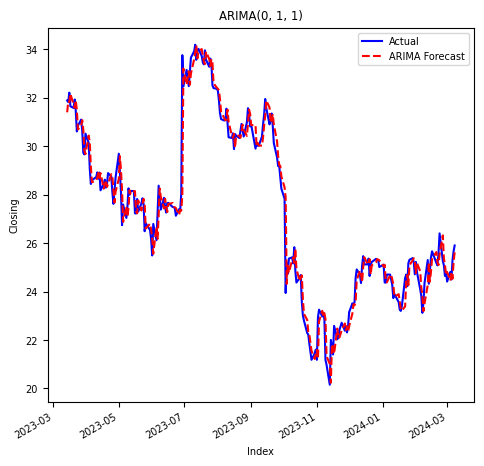

In [45]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

# Ignore first row because of difference factor d = 1
data_AutoArima['diffval'].iloc[1:].plot(color='b', linestyle='-', ax=axarr, label='Actual')
data_AutoArima['ARIMA'].iloc[1:].plot(color='r', linestyle='--', ax=axarr, label='ARIMA Forecast')
axarr.set_title('ARIMA(0, 1, 1)')
axarr.set_xlabel('Index')
axarr.set_ylabel('Closing')
axarr.legend()  # Add legend

plt.show()

In [38]:
result = arima_obj_fit.get_forecast()
forecast_AutoArima = result.predicted_mean

In [39]:
# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast_AutoArima, ci[0, 0], ci[0, 1]))

80.0% Confidence Interval: 25.873 between 24.984 and 26.763
90.0% Confidence Interval: 25.873 between 24.731 and 27.015
95.0% Confidence Interval: 25.873 between 24.513 and 27.233
99.0% Confidence Interval: 25.873 between 24.085 and 27.661


This output suggests that as the confidence level increases, the width of the confidence interval also increases, reflecting greater uncertainty in the forecast. This is a common characteristic of confidence intervals: higher confidence levels lead to wider intervals.

In [40]:
# Calculate evaluation metrics
mae = mean_absolute_error(data_AutoArima['diffval'], data_AutoArima['ARIMA']) #Average absolute difference between the predicted values and the actual values.
mse = mean_squared_error(data_AutoArima['diffval'], data_AutoArima['ARIMA']) #Average of the squared differences between the predicted values and the actual values. 
rmse = np.sqrt(mse) #The RMSE indicates the deviation of the forecasts from the actual values.
mape = np.mean(np.abs((data_AutoArima['diffval'] - data_AutoArima['ARIMA']) / data_AutoArima['diffval'])) * 100
# The MAPE calculates the average percentage difference between the predicted and actual values. 
# 
# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.5881725721771991
Mean Squared Error (MSE): 4.423670314701485
Root Mean Squared Error (RMSE): 2.1032523183635115
Mean Absolute Percentage Error (MAPE): 2.125394624817293


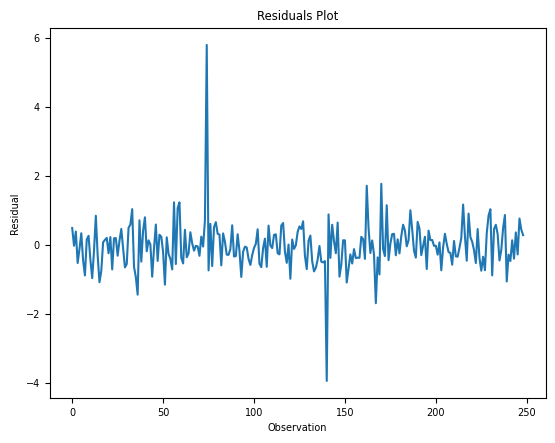

In [41]:
# Plot residuals
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()

We can see that the trend and seasonality information extracted from the series does seem reasonable. The residuals are also interesting, showing periods of high variability particularly towards the end of May and July. To mitigate this variability, one approach is to utilize cross-validation. For this purpose, walk-forward validation is employed on the following steps.

### Walk-forward validation

Walk-forward validation provides a more realistic assessment of a model's performance because it simulates how the model would perform in a real-world scenario where new data becomes available over time. It helps to identify any potential issues with the model, such as overfitting or underfitting, and allows for adjustments to be made accordingly.

predicted=22.580000, expected=22.030001
predicted=22.030001, expected=22.110001
predicted=22.110001, expected=22.420000
predicted=22.420000, expected=22.709999
predicted=22.709999, expected=22.379999
predicted=22.379999, expected=22.570000
predicted=22.570000, expected=22.309999
predicted=22.309999, expected=22.590000
predicted=22.590000, expected=23.150000
predicted=23.150000, expected=23.510000
predicted=23.510000, expected=23.430000
predicted=23.430000, expected=23.570000
predicted=23.570000, expected=24.559999
predicted=24.559999, expected=24.910000
predicted=24.910000, expected=24.700001
predicted=24.700001, expected=24.350000
predicted=24.350000, expected=25.049999
predicted=25.049999, expected=25.459999
predicted=25.459999, expected=25.120001
predicted=25.120001, expected=25.120001
predicted=25.120001, expected=25.360001
predicted=25.360001, expected=24.639999
predicted=24.639999, expected=25.120001
predicted=25.120001, expected=25.219999
predicted=25.219999, expected=25.350000


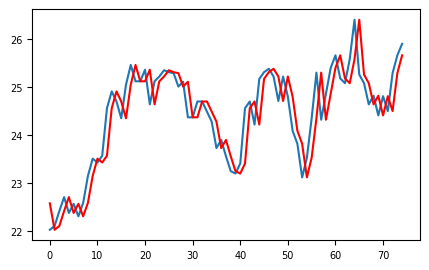

In [42]:
from math import sqrt
X = df_stock["Close"].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.rcParams['figure.figsize'] = (5, 3)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [43]:
# Get AIC
aic = model_fit.aic
print('AIC:', aic)

AIC: 527.8158572571778


In [44]:
# Calculate evaluation metrics
mae = mean_absolute_error(test, predictions) #Average absolute difference between the predicted values and the actual values.
mse = mean_squared_error(test, predictions) #Average of the squared differences between the predicted values and the actual values. 
rmse = np.sqrt(mse) #The RMSE indicates the deviation of the forecasts from the actual values.
mape = np.mean(np.abs((test - predictions) / test)) * 100
# The MAPE calculates the average percentage difference between the predicted and actual values. 
# 
# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.38773330666666683
Mean Squared Error (MSE): 0.22875727466754672
Root Mean Squared Error (RMSE): 0.4782857667415441
Mean Absolute Percentage Error (MAPE): 1.5837764429196477


The MAPE value of approximately 1.58% indicates that, on average, the model's forecasts deviate from the actual values by about 1.58%.

Test RMSE: 0.478
With 70% of the data used for training, the model achieved an RMSE of approximately 0.478. This indicates the typical deviation of the model's forecasts from the actual values in the testing set.

Test RMSE: 0.511
Increasing the training set size to 80% resulted in a slightly higher RMSE of approximately 0.511. This suggests that using more data for training did not necessarily lead to better performance, and there may have been a tradeoff between bias and variance.

Test RMSE: 0.586
This suggests that using more data for training did not necessarily lead to better performance, and there may have been a tradeoff between bias and variance.

Test RMSE: 0.549
Reducing the training set size to 66% led to a higher RMSE of approximately 0.549. This indicates that with less data for training, the model's performance deteriorated, likely due to insufficient data to learn the underlying patterns in the time series effectively.

### Searching for the best parameters

In [113]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,2):
            try:
                arima_obj = ARIMA(df_stock['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 529.0525747065956], [0, 1, 1, 528.7876880779264], [1, 1, 0, 528.8089044438536], [1, 1, 1, 530.7878566393251], [2, 1, 0, 530.7909181032128], [2, 1, 1, 532.7861797534616], [0, 2, 0, 722.0139177674099], [0, 2, 1, 535.2025108559635], [1, 2, 0, 637.4969565306967], [1, 2, 1, 535.0876941957835], [2, 2, 0, 606.6838570039649], [2, 2, 1, 537.0786589297061]]


This suggests that the lowest AIC of 528.78 is achieved with p=0 and q=1, which is the same as AutoARIMA. However, a lower AIC is achieved with p=0 and q=0, as shown earlier.

### Performance with walk-forward validation compared to a simple one-time forecast
The reason we observe better performance with walk-forward validation compared to a simple one-time forecast without it is due to the difference in how the model is trained and tested.

In walk-forward validation:

- The model is retrained at each step using only the data available up to that point in time.
- This allows the model to adapt to changes in the data over time, capturing evolving patterns and trends.
- Each forecast is based on a model that has been updated with the latest information available, leading to potentially more accurate predictions.

On the other hand, when the model is trained once on the entire training set and then make a single forecast:

- The model is trained on historical data but does not adapt to new information.
- It may capture patterns in the historical data but may not be able to capture changes or trends that occur after the training period.
- The forecast is based on a model trained on a fixed dataset, which may not be optimal for predicting future values.

In summary, walk-forward validation allows the model to dynamically adjust to changes in the data over time, resulting in potentially more accurate predictions. Without it, the model may struggles to capture evolving patterns and trends, leading to less accurate forecasts, especially due to this data is non-stationary and exhibits complex patterns.